In [2]:
import h5py
import numpy as np
import torch
import utils
import matplotlib.pyplot as plt
from utils import polarToCartesian, cartesianToPolar, kspaceto2dimage
import utils
import data.transforms as tf

In [3]:
f = h5py.File("/home/ranka47/git/CSC2541-ML4H/datasets/fastmri/file1000081.h5", "r")
slice = np.stack([f['kspace'][12].real, f['kspace'][12].imag], axis=-1)
slice_complex = f['kspace'][12]
print(slice_complex.shape)
print(slice_complex.dtype)
print(torch.Tensor(slice).dtype)

(640, 372)
complex64
torch.float32


In [3]:
slice_recons_1 = polarToCartesian(cartesianToPolar(slice_complex))
slice_recons_2 = polarToCartesian(cartesianToPolar(torch.Tensor(slice)))

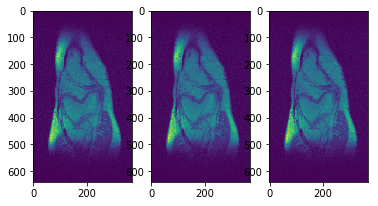

In [4]:
plt.subplot(131); plt.imshow(utils.kspaceto2dimage(torch.Tensor(slice), False))
plt.subplot(132); plt.imshow(utils.kspaceto2dimage(torch.Tensor(slice_recons_1), False))
plt.subplot(133); plt.imshow(utils.kspaceto2dimage(torch.Tensor(slice_recons_2), False))

In [13]:
print(
    torch.sum(torch.Tensor(slice[...,0]) - slice_recons_1[...,0]), 
    torch.sum(torch.Tensor(slice[...,1]) - slice_recons_1[...,1])
)
print(
    torch.sum(torch.Tensor(slice[...,0]) - slice_recons_2[...,0]), 
    torch.sum(torch.Tensor(slice[...,1]) - slice_recons_2[...,1])
)

tensor(6.0911e-10) tensor(1.3689e-09)
tensor(-2.1955) tensor(-0.0712)


In [26]:
magnitude = np.vectorize(np.linalg.norm)
mag_1 = magnitude(slice_complex)
mag_2 = torch.norm(torch.Tensor(slice), dim=-1)
output = torch.Tensor(np.stack([mag_2], axis=-1)).squeeze()
output.shape


torch.Size([640, 368])

In [24]:
phase = np.vectorize(np.angle)
phase_1 = phase(slice_complex)
phase_2 = torch.atan(torch.div(torch.Tensor(slice)[...,0], torch.Tensor(slice)[...,1]))
phase_2[torch.isnan(phase_2)] = 0.0

In [28]:
print(torch.sum(torch.Tensor(mag_1) - mag_2))
print(torch.sum(torch.Tensor(mag_1) - torch.Tensor(slice[...,0])))
print(torch.sum(torch.Tensor(mag_1) - slice_recons_1[...,0]))
print(torch.sum(torch.Tensor(mag_2) - slice_recons_2[...,0]))

print(torch.sum(torch.Tensor(mag_1) - output))

print(torch.sum(torch.Tensor(phase_1) - phase_2))

tensor(-3.0209e-09)
tensor(3.5613)
tensor(3.5613)
tensor(1.3659)
tensor(-3.0209e-09)
tensor(514.0873)


(640, 372, 2)


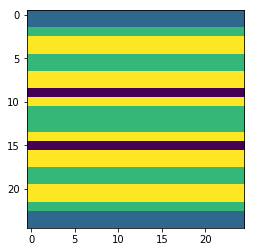

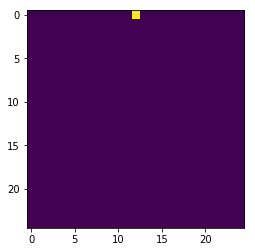

In [438]:
slice_zero = np.stack([f['kspace'][12].real, f['kspace'][12].imag], axis=-1).copy()
print(slice_zero.shape)
slice_zero = np.zeros((25,25,2))
#slice_zero[160, 240, 0] = 0.00000000002
#slice_zero[160, 240, 1] = 0.00000000001
slice_zero[0,12,0] = 0.01
slice_zero[0,12,1] = 0
slice_torch = torch.Tensor(slice_zero)
image = kspaceto2dimage(slice_torch, polar = False, cropping = True, resolution = 25)
utils.plotimage(image)
utils.plotimage(tf.complex_abs(slice_torch * 100000))

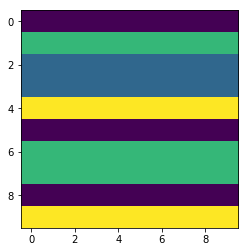

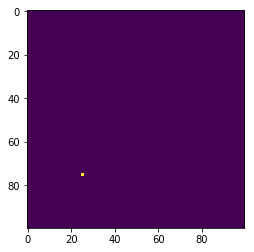

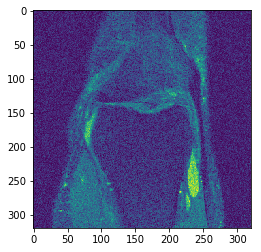

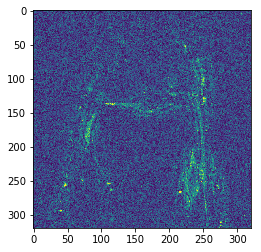

In [269]:
temp = np.array(slice).copy()
temp[310:330, 176:196] = 0.0
utils.plotimage(kspaceto2dimage(torch.Tensor(temp), polar = False, cropping = True, resolution = 320))

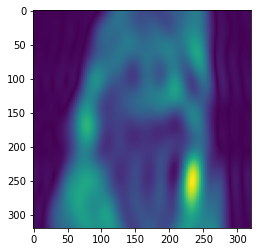

In [270]:
temp_high = np.array(slice).copy()
temp_high[temp != 0.0] = 0.0
utils.plotimage(kspaceto2dimage(torch.Tensor(temp_high), polar = False, cropping = True, resolution = 320))

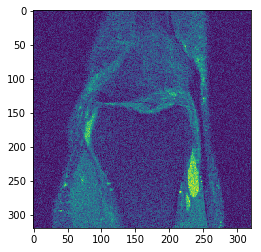

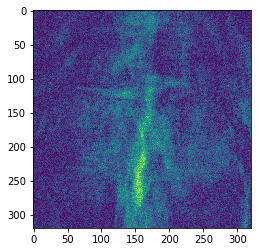

In [91]:
temp_polar = cartesianToPolar(torch.Tensor(slice))
temp_mag = temp_phase = np.array(temp_polar).copy()
temp_mag[...,0] = temp_mag[...,0]*7
utils.plotimage(kspaceto2dimage(torch.Tensor(polarToCartesian(torch.Tensor(temp_mag))), polar = False, cropping = True, resolution = 320))
temp_phase[...,1] = temp_phase[...,1]*2
utils.plotimage(kspaceto2dimage(torch.Tensor(polarToCartesian(torch.Tensor(temp_phase))), polar = False, cropping = True, resolution = 320))

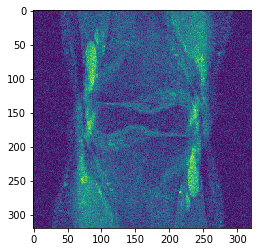

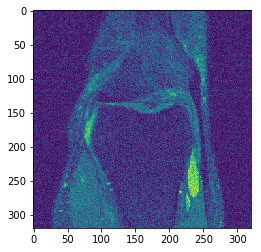

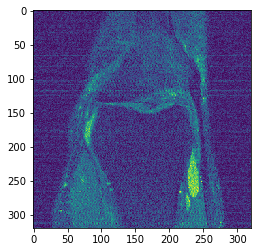

In [95]:
temp_polar = cartesianToPolar(torch.Tensor(slice))
temp_mag = temp_phase = np.array(temp_polar).copy()
temp_mag[...,100,0] = temp_mag[...,100,0]*7
utils.plotimage(kspaceto2dimage(torch.Tensor(polarToCartesian(torch.Tensor(slice))), polar = False, cropping = True, resolution = 320))
utils.plotimage(kspaceto2dimage(torch.Tensor(polarToCartesian(torch.Tensor(temp_mag))), polar = False, cropping = True, resolution = 320))
temp_phase[...,100,0] = temp_phase[...,100,0]*2
utils.plotimage(kspaceto2dimage(torch.Tensor(polarToCartesian(torch.Tensor(temp_phase))), polar = False, cropping = True, resolution = 320))